# ==============================================
# Author   : Fatemeh Mohammadinia
# Project  : Heart Attack Data Analysis
# Version  : 4.0
# Description:
#     This project performs exploratory data analysis,
#     preprocessing, and classification modeling on a dataset 
#     related to heart attack indicators.
# ==============================================


# Import necessary libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# Load the Dataset

In [2]:
Data = pd.read_csv('/kaggle/input/heart-attack-dataset-tarik-a-rashid/Medicaldataset.csv') 
df = pd.DataFrame(Data)

##### The attributes of this dataset are: age, gender, heart rate, systolic blood pressure, diastolic blood pressure, blood sugar, ck-mb and troponin with negative or positive output.
###### The dataset has 9 column:
###### Age: The patient's age 
###### Gender: Biological sex of the patient (The male is set to 1 and the female to 0)
###### Heart Rate: The number of heartbeats per minute
###### Systolic Blood Pressure: The pressure in arteries when the heart contracts
###### Diastolic Blood Pressure:  The pressure in arteries between heartbeats
###### Blood Sugar: The patient's blood glucose level
###### Ck-mb:  A cardiac enzyme released during heart muscle damage
###### Troponin:A highly specific protein biomarker for heart muscle injury
###### Result: The outcome label indicating whether or not the patient experienced a heart attack

In [3]:
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


### Function to describe dataset characteristics

In [4]:
def describe(df):
    variables = []     # List to store the names of columns (variables)
    dtypes = []        # List to store the data types of each column
    count = []         # List to store the total number of entries in each column
    unique = []        # List to store the number of unique values in each column
    missing = []       # List to store the number of missing (NaN) values in each column
    Prc_missing = []   # List to store the percentage of missing values per column
    
    # Loop through each column in the DataFrame
    for item in df.columns:
        variables.append(item)                       # Add the column name to the list
        dtypes.append(df[item].dtype)                 # Add the column data type to the list
        count.append(len(df[item]))                   # Add the total count of entries
        unique.append(len(df[item].unique()))         # Add the number of unique entries
        missing.append(df[item].isna().sum())          # Add the number of missing values
        Prc_missing.append(df[item].isnull().sum() * 100 / len(df))  # Calculate % of missing values
        
    # Create a new DataFrame to organize the results
    output = pd.DataFrame({
        'Variables': variables,             # Column names
        'Dtype': dtypes,                     # Data types
        'Count': count,                      # Total number of entries
        'Missing Value': missing,            # Number of missing values
        'Percent Missing Value': Prc_missing # Percentage of missing values
    })
    
    return output    # Return the summary DataFrame

In [5]:
# Describe the dataset
describe(df)

,Variables,Dtype,Count,Missing Value,Percent Missing Value
0,Age,int64,1319,0,0.0
1,Gender,int64,1319,0,0.0
2,Heart rate,int64,1319,0,0.0
3,Systolic blood pressure,int64,1319,0,0.0
4,Diastolic blood pressure,int64,1319,0,0.0
5,Blood sugar,float64,1319,0,0.0
6,CK-MB,float64,1319,0,0.0
7,Troponin,float64,1319,0,0.0
8,Result,object,1319,0,0.0


### statistical summary of a DataFrame

In [6]:
# Generate a basic statistical summary of the DataFrame
des_df = df.describe()

# Apply a background gradient color styling to the summary
# 'YlGnBu' is a colormap that transitions from Yellow to Green to Blue
styled_desc = des_df.style.background_gradient(cmap='YlGnBu')

# Display the styled DataFrame with the background gradient
styled_desc

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [7]:
# Create an empty dictionary to store value counts for each column
counts = {}

# Loop through the DataFrame sliced with selected columns
for i in df[["Gender", "Result"]]: 
    # Store the value counts of each column in the dictionary
    counts[i] = df[i].value_counts()
    
    # Print the value counts for the current column
    print("Value counts for {} \n".format(counts[i])) 

Value counts for Gender
1    870
0    449
Name: count, dtype: int64 

Value counts for Result
positive    810
negative    509
Name: count, dtype: int64 



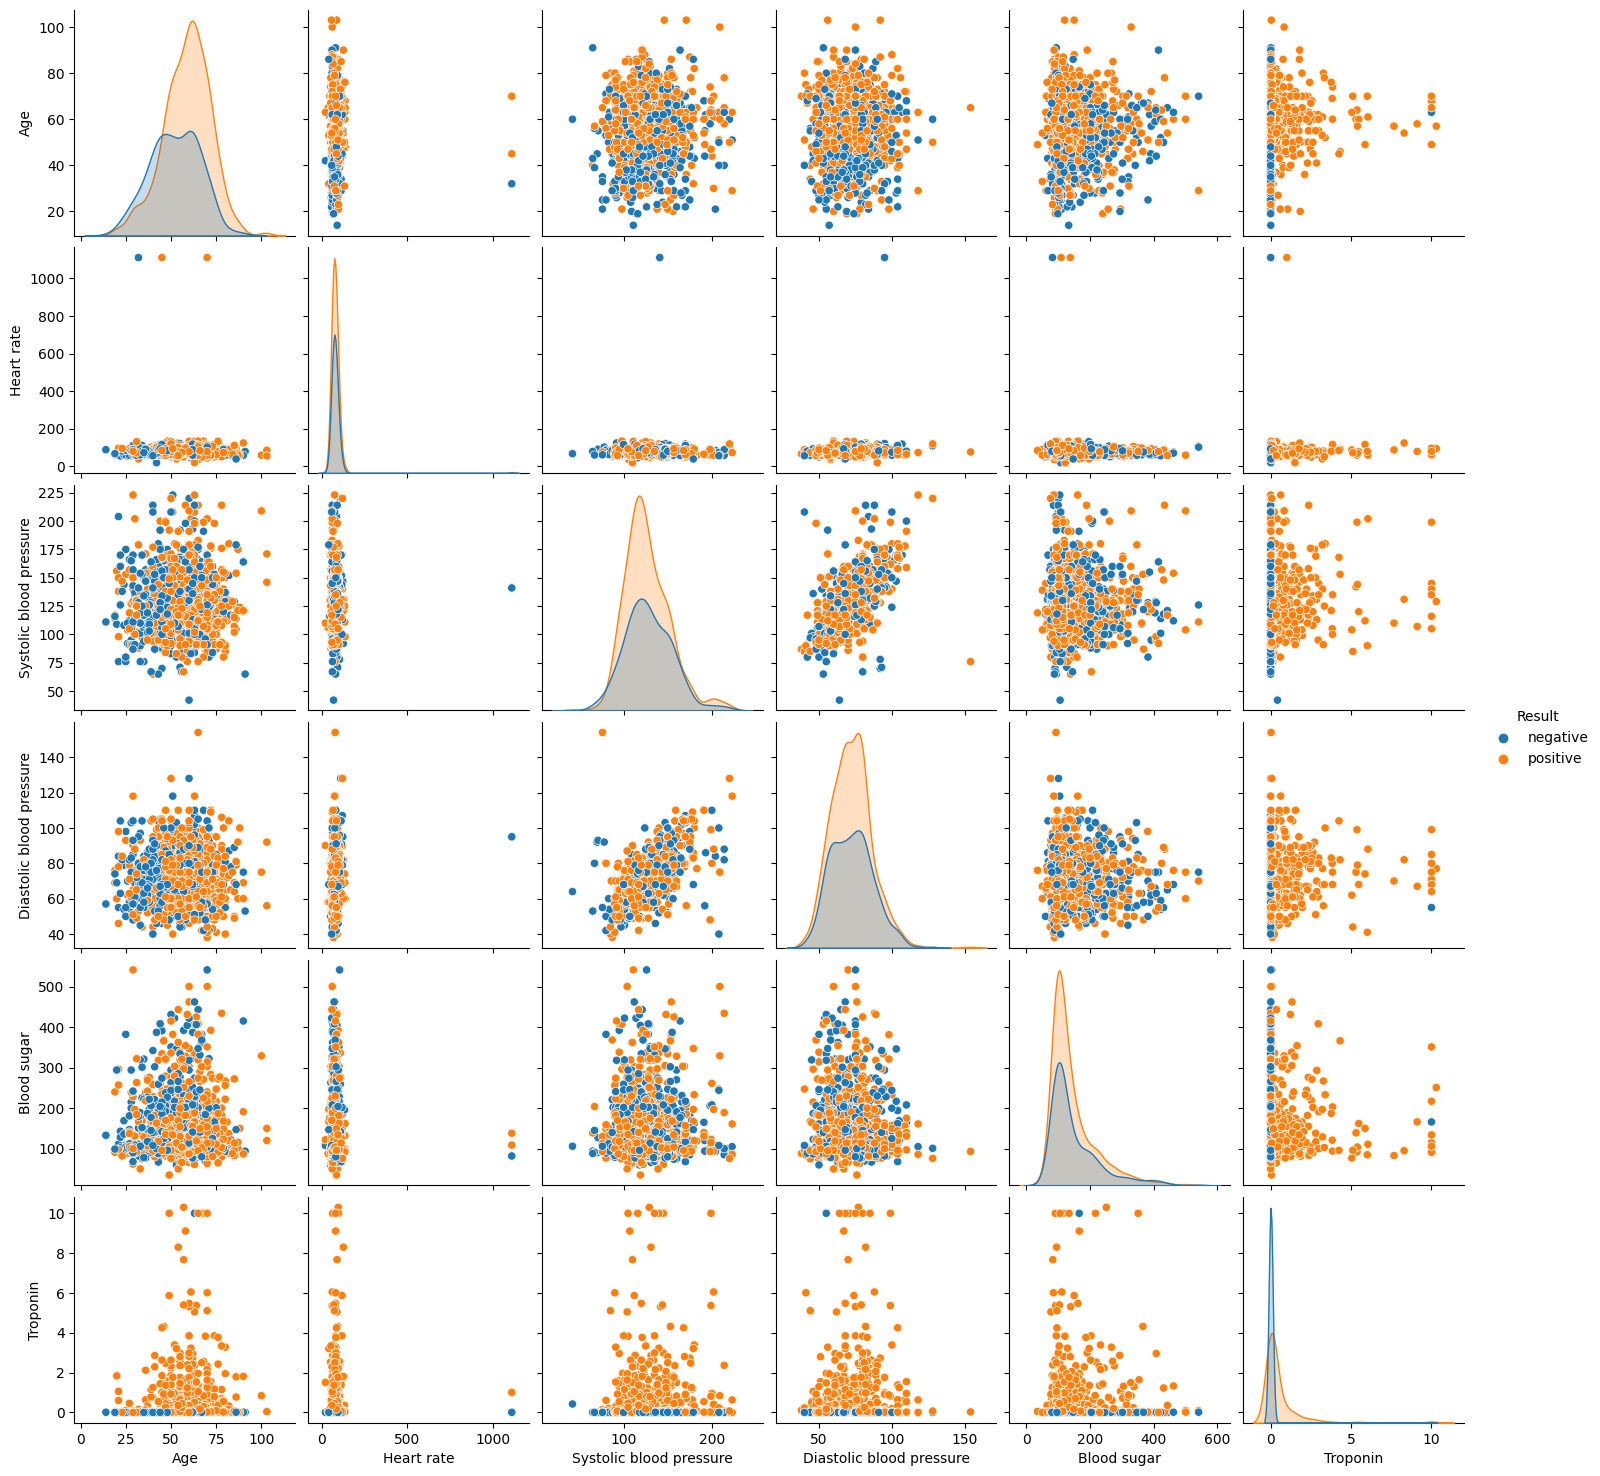

In [8]:
sns.pairplot(df, hue="Result", vars=["Age", "Heart rate", "Systolic blood pressure", "Diastolic blood pressure", "Blood sugar","Troponin"])
plt.show()

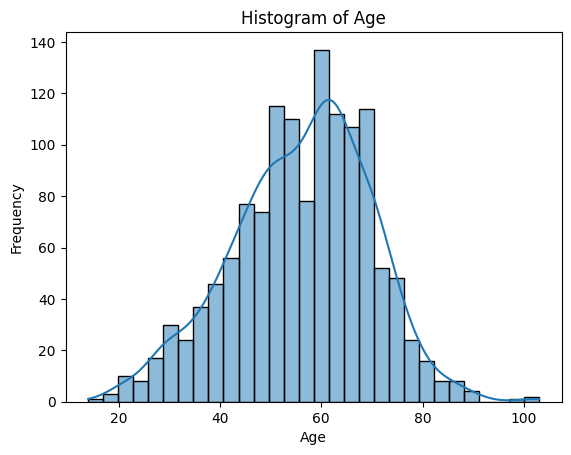

In [9]:
# Create a histogram of the 'Age' column with 30 bins and a KDE (Kernel Density Estimate) line
sns.histplot(data=df, x='Age', bins=30, kde=True)

# Set the label for the x-axis
plt.xlabel('Age')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Set the title of the plot
plt.title('Histogram of Age')

# Display the plot
plt.show()

### Heart Rate vs Age
#### 60–100 bpm: Normal resting heart rate in adults.
#### 100–130 bpm: Often seen during heart attacks due to stress, pain, or oxygen demand.
#### 130–150 bpm: May indicate a stronger sympathetic response or early arrhythmia.
#### 150–200 bpm: Suggests possible serious arrhythmias; clinical evaluation recommended.
#### Above 200 bpm: Rare and potentially life-threatening; may reflect ventricular tachycardia or fibrillation.

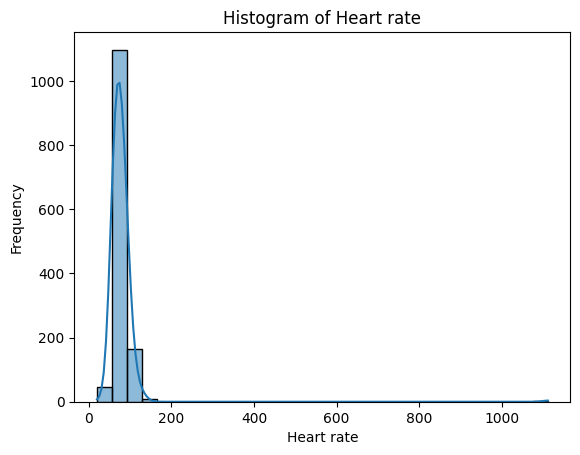

In [10]:
# Create a histogram of the 'Heart rate' column with 30 bins and a KDE (Kernel Density Estimate) line
sns.histplot(data=df, x='Heart rate', bins=30, kde=True)

# Set the label for the x-axis
plt.xlabel('Heart rate')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Set the title of the plot
plt.title('Histogram of Heart rate')

# Display the plot
plt.show()

In [11]:
df = df[df['Heart rate'] <= 200]

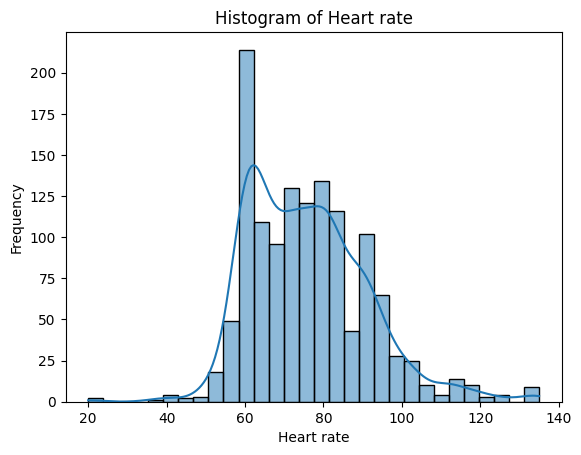

In [12]:
# Create a histogram of the 'Heart rate' column with 30 bins and a KDE (Kernel Density Estimate) line
sns.histplot(data=df, x='Heart rate', bins=30, kde=True)

# Set the label for the x-axis
plt.xlabel('Heart rate')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Set the title of the plot
plt.title('Histogram of Heart rate')

# Display the plot
plt.show()

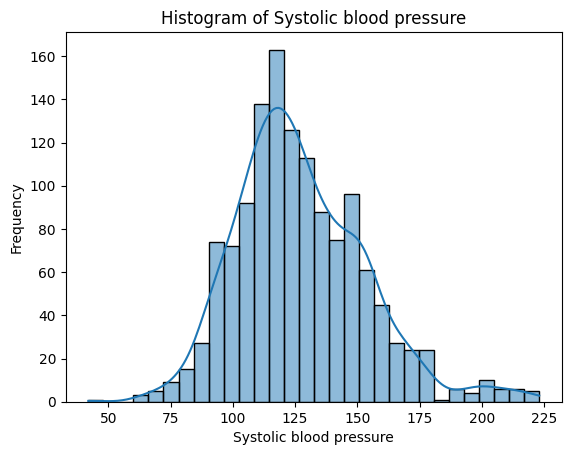

In [13]:
# Create a histogram of the 'Systolic blood pressure' column with 30 bins and a KDE (Kernel Density Estimate) line
sns.histplot(data=df, x='Systolic blood pressure', bins=30, kde=True)

# Set the label for the x-axis
plt.xlabel('Systolic blood pressure')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Set the title of the plot
plt.title('Histogram of Systolic blood pressure')

# Display the plot
plt.show()

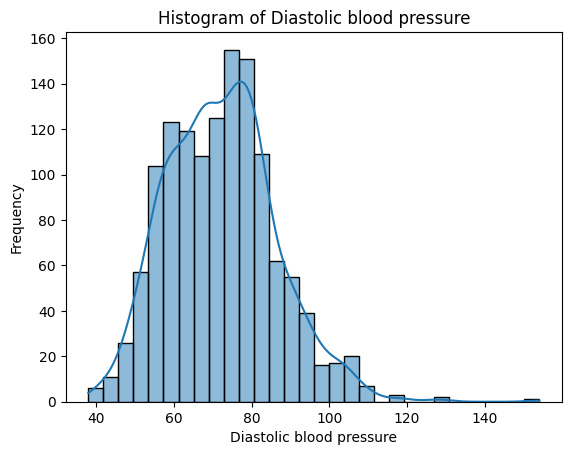

In [14]:
# Create a histogram of the 'Diastolic blood pressure' column with 30 bins and a KDE (Kernel Density Estimate) line
sns.histplot(data=df, x='Diastolic blood pressure', bins=30, kde=True)

# Set the label for the x-axis
plt.xlabel('Diastolic blood pressure')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Set the title of the plot
plt.title('Histogram of Diastolic blood pressure')

# Display the plot
plt.show()

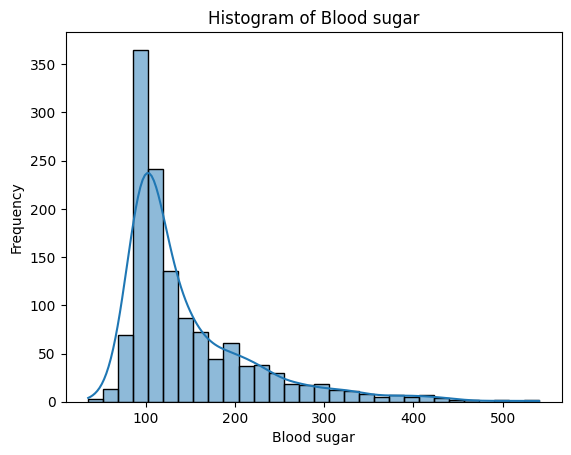

In [15]:
# Create a histogram of the 'Blood sugar' column with 30 bins and a KDE (Kernel Density Estimate) line
sns.histplot(data=df, x='Blood sugar', bins=30, kde=True)

# Set the label for the x-axis
plt.xlabel('Blood sugar')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Set the title of the plot
plt.title('Histogram of Blood sugar')

# Display the plot
plt.show()

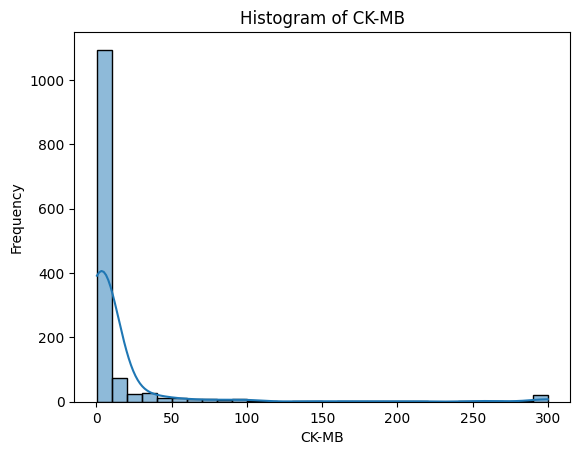

In [16]:
# Create a histogram of the 'CK-MB' column with 30 bins and a KDE (Kernel Density Estimate) line
sns.histplot(data=df, x='CK-MB', bins=30, kde=True)

# Set the label for the x-axis
plt.xlabel('CK-MB')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Set the title of the plot
plt.title('Histogram of CK-MB')

# Display the plot
plt.show()

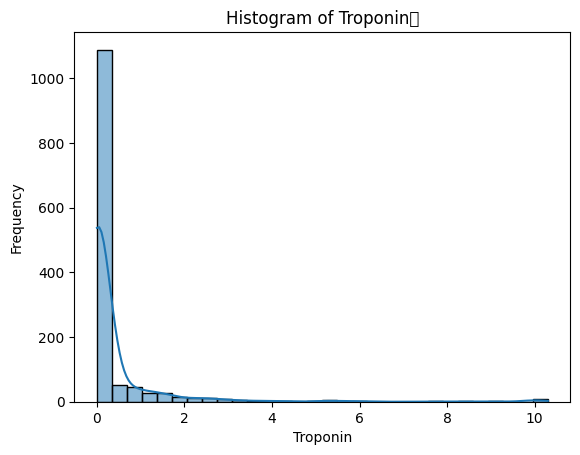

In [17]:
# Create a histogram of the 'Troponin' column with 30 bins and a KDE (Kernel Density Estimate) line
sns.histplot(data=df, x='Troponin', bins=30, kde=True)

# Set the label for the x-axis
plt.xlabel('Troponin')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Set the title of the plot
plt.title('Histogram of Troponin	')

# Display the plot
plt.show()

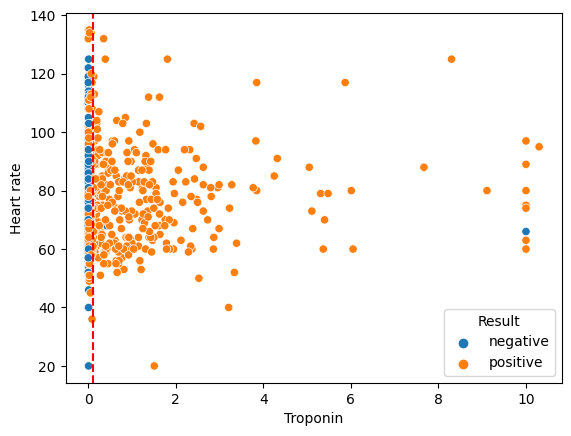

In [18]:
sns.scatterplot(data=df, x='Troponin', y='Heart rate', hue='Result')

plt.axvline(0.1, color='red', linestyle='--')

plt.show()

In [19]:
df = df[~((df['Troponin'] > 9) & (df['Result'] == 'negative'))]

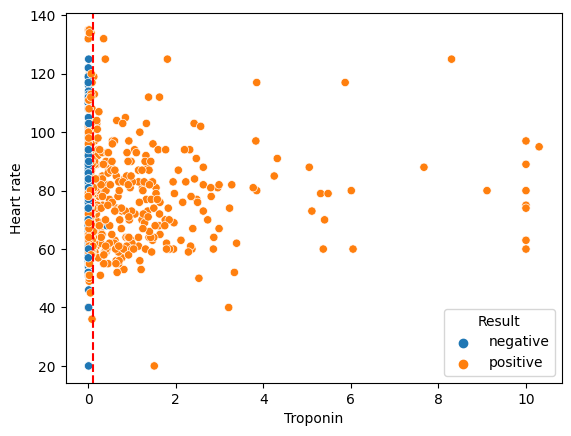

In [20]:
sns.scatterplot(data=df, x='Troponin', y='Heart rate', hue='Result')

plt.axvline(0.1, color='red', linestyle='--')

plt.show()

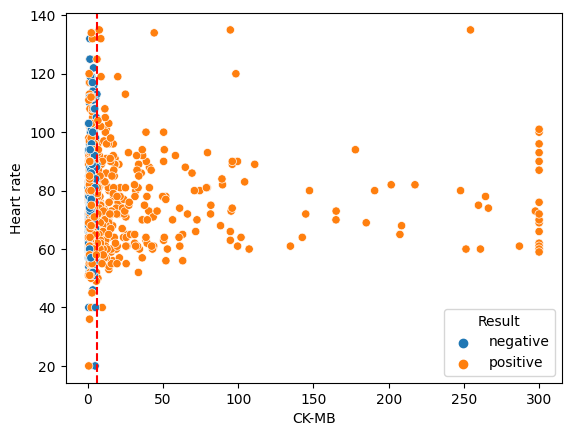

In [21]:
sns.scatterplot(data=df, x='CK-MB', y='Heart rate', hue='Result')

plt.axvline(6, color='red', linestyle='--')

plt.show()

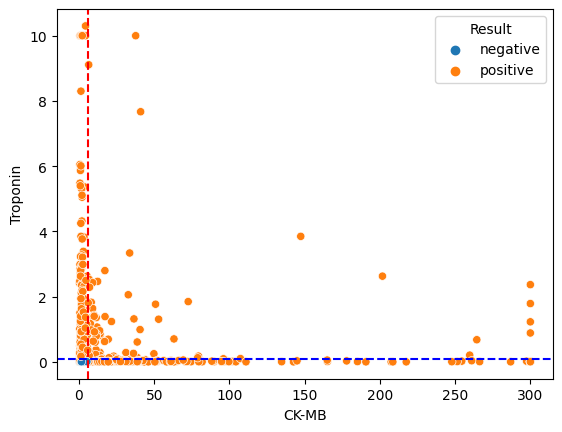

In [22]:
sns.scatterplot(data=df, x='CK-MB', y='Troponin', hue='Result')
plt.axvline(6, color='red', linestyle='--')
plt.axhline(0.1, color='blue', linestyle='--')

plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [24]:
x = df[["Age", "Heart rate", "Systolic blood pressure", "Diastolic blood pressure", 
        "Blood sugar", "CK-MB", "Troponin"]]

scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)
x_normalized_df = pd.DataFrame(x_normalized, columns=["Age", "Heart rate", "Systolic blood pressure", "Diastolic blood pressure", 
        "Blood sugar", "CK-MB", "Troponin"])
x_normalized_df['Gender'] = df['Gender'].values

print(x_normalized_df.head())

df["Result"] = (df["Result"] == "positive").astype(int)

y = df["Result"]

        Age  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0  0.571772   -0.654043                 1.257186                  0.769269   
1 -2.581535    1.179090                -1.114364                 -1.873633   
2 -0.088222   -0.784981                 1.257186                  0.340690   
3  0.571772   -0.392167                -0.272846                 -1.230765   
4 -0.088222   -0.784981                -0.578853                 -0.516467   

   Blood sugar     CK-MB  Troponin  Gender  
0     0.177333 -0.291421 -0.303772       1  
1     1.991204 -0.184681  0.628065       1  
2     1.644434 -0.287324 -0.311775       1  
3     1.644434 -0.031147 -0.205965       1  
4     2.044553 -0.306947 -0.311775       1  


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized_df,y,test_size=0.3,random_state=0)

In [26]:
classifier = DecisionTreeClassifier()

In [27]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = classifier.predict(x_test)

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9949367088607595
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       148
           1       0.99      1.00      1.00       247

    accuracy                           0.99       395
   macro avg       1.00      0.99      0.99       395
weighted avg       0.99      0.99      0.99       395



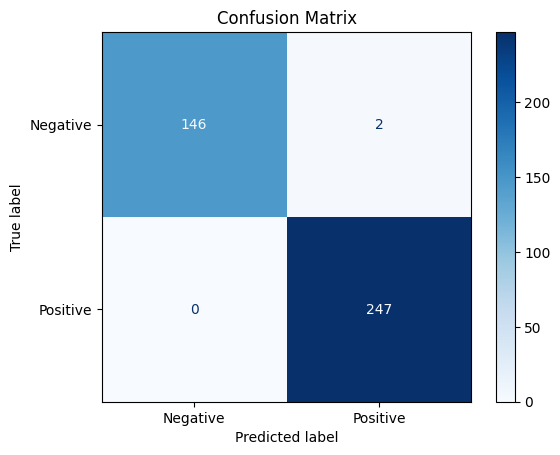

In [30]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()